![dsl_logo.png](https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/dsl_logo.png)

# Analyzing Web Archives

Welcome to the Digital Scholarship Lab Level Analyzing Web Archives workshop. The following notebook provides an investigation into the [Meme Generator dataset](https://www.loc.gov/item/2018655320/)


## How this notebook works

This webpage is a Google Colab notebook and is comprised of different *cells*. Some are code cells that run Python snippets. To works through these cells simply click on the triangle _run_ button in each cell. Click in the cell below to see the play button, then click on it.

In [3]:
!pip3 install langdetect
!pip3 install pandas
!pip3 install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image,display,IFrame
from ipywidgets import widgets,interact,interact_manual
from langdetect import detect
import matplotlib.pyplot as plt

global rando

%matplotlib inline
print("\nLibraries loaded, and ready to run!")

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

Libraries loaded, and ready to run!


# Loading our data set

The information from this archive is saved in a _CSV_ file. Or put in otherwords, something like a spreadsheet. In the next cell we will load this file into something call a dataframe and we'll look at the first 5 entries by looking at the **head**.

In [4]:
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data["Meme ID"] = meme_data["Meme ID"].astype(str)

meme_data.head(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
0,10509464,http://webarchive.loc.gov/all/0/http://cdn.mem...,Spiderman Approves,http://memegenerator.net/instance/10509464,91eee1453f2b66b4b0d662476bf630d8,87868,seems legit,Spiderman Approves,seems,legit
1,12285257,http://webarchive.loc.gov/all/0/http://cdn.mem...,Alright Then Business Kid,http://memegenerator.net/instance/12285257,96a3aa60c0f3a5ffb027e8977f23b2cc,110242,Fret not I stayed at a Holiday Inn Express las...,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,20612245,http://webarchive.loc.gov/all/0/https://cdn.me...,Archer,http://memegenerator.net/instance/20612245,1b84704851704a2dc366768a2210d659,125963,"hello airplanes? yeah, this is blimps. Yeah, y...",Archer,"hello airplanes? yeah, this is blimps.","Yeah, you win."
3,20614628,http://webarchive.loc.gov/all/0/http://cdn.mem...,Futurama Fry,http://memegenerator.net/instance/20614628,448f5d4a15f5c90ce4d64c75013c8e9a,161623,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,BUt Scared monster under the bed will eat me
4,24194267,http://webarchive.loc.gov/all/0/https://cdn.me...,One Does Not Simply,http://memegenerator.net/instance/24194267,37feb180a0e7660e360ed94380b39f60,92866,one does not simply put toothpaste back in th...,One Does Not Simply,one does not simply,put toothpaste back in the tube




---


# Some General Data Exploration


### How much data?

We can count the **length** of our data frame to see how many entries we have using thing len() function.


In [5]:

print("We have this many memes to look at: ",len(meme_data))


We have this many memes to look at:  57687


### Random Entry

To get a better sense of what is in our dataset let's look at a random entry by using **sample** with a value of 1. Click the below button a few times to get a few different options.

In [6]:
rando = meme_data.sample(1)
display(Image(url=rando['Archived URL'].values[0], format='jpg'))
print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
rando

View on Memegenerator: 	 http://memegenerator.net/instance/11388320
View on Archive: 			 http://webarchive.loc.gov/all/0/https://cdn.meme.am/instances/250x250/11388320.jpg


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
11387,11388320,http://webarchive.loc.gov/all/0/https://cdn.me...,Butthurt Dweller Original,http://memegenerator.net/instance/11388320,5cb002b1b9c5fca5b52c4c0e63ebaaaa,41194,md3 makaroooov >d,Butthurt Dweller Original,md3,makaroooov >d


**Q1** Have a look at the data that is associated with a random record. In the chat box suggest some things you might want to explore with this data? Share your reponse in the chat box.

## Category of memes?

As you might know, memes come in many different flavours. Let's see if we can find out how many types there are? We'll do this by **grouping** our _Base Meme Name_ column and **counting** how many entries are in each.

In [7]:
meme_data.groupby(["Base Meme Name"]).count()

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
-,70,70,70,70,70,70,70,70,70
10guy,1,1,1,1,1,1,1,1,1
12 oz mouse,9,9,9,9,9,9,9,9,9
158,66,66,66,66,66,66,66,66,66
1889 [10] guy,52,52,52,52,52,52,52,52,52
...,...,...,...,...,...,...,...,...,...
ТИПИЧНАЯ DIVA,45,45,45,45,45,45,45,45,45
ТИПИЧНЫЙ JONGHYUN,1,1,1,1,1,1,1,1,1
ТИПИЧНЫЙ ONEW,1,1,1,1,1,1,1,1,1


**Q2** Based on the above summary how many different type so memes we have? Share your response in the chat box.

Yikes! That looks like a lot. Let's just keep the top **25** entries. We'll do this by **sorting**.

In [8]:

top_25_cat = pd.DataFrame(meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)["Meme ID"][0:25])
top_25_cat

,Meme ID
Base Meme Name,
Y U No,766
Futurama Fry,663
Insanity Wolf,612
Philosoraptor,531
The Most Interesting Man In The World,511
Success Kid,510
Foul Bachelor Frog,469
Socially Awkward Penguin,446
Advice Yoda Gives,420


## A Random Entry by Meme Category


In [9]:
#Random Entry Form
def show_random(choice):
  rando = meme_data[meme_data["Base Meme Name"] == str(choice)].sample(1)
  print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
  print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
  display(Image(url=rando['Archived URL'].values[0], format='jpg'))
  display(rando)


title_textbox = widgets.Text(
    value='Me Gusta',
    description='Category',
)
print("Enter a meme category from the list above to see a random entry in that category")
print("Click 'Show' to display\n")
show_random_control = interact_manual.options(manual_name="Show")
show_random_control(show_random,choice=title_textbox);


Enter a meme category from the list above to see a random entry in that category
Click 'Show' to display



interactive(children=(Text(value='Me Gusta', description='Category'), Button(description='Show', style=ButtonS…

Let's know look at how the meme is displayed as a table

What's the **average** number of memes in each type?



In [10]:
meme_type_average = meme_data.groupby(["Base Meme Name"])["Meme ID"].count().mean()
print("Average number of entries per meme category: ",meme_type_average)

Average number of entries per meme category:  34.940642035130224


The average might be a little misleading. Let's also check what the median number is for each base meme. The code chunk below is incomplete. Can you resolve the error?

In [11]:
meme_type_median = meme_data.groupby(["Base Meme Name"])["Meme ID"].count().median()
print("The median number of entires per base meme is: ",meme_type_median)

The median number of entires per base meme is:  13.0


As you can see, the difference between the mean and the median is significant. This is because there's a skewed distribution in our dataset. Do you have any guesses as to why this might be the case? Share your thoughts in the chat!

Let's visualize this skewed distribution by drawing a **histogram**.

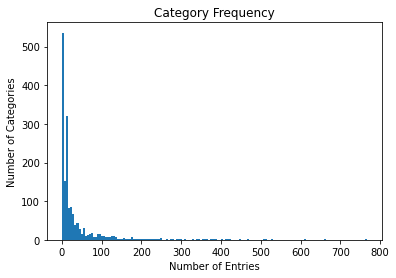

In [12]:
bins = 150

plt.hist(meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)["Meme ID"],bins)

plt.title("Category Frequency")
plt.xlabel("Number of Entries")
plt.ylabel("Number of Categories")
plt.show()

**Q3** Can you describe this graph? What is the biggest value that it is showing?



---


# Enriching the Data

We've had some fun looking at different components of the data, but let's see if we an **enrich** the data by adding more columns of information to it.

# Language info

As we've seen in our examples there are many different languages represented in our dataset. Let's see if we can **enrich** our dataset by automatically detecting what language it is and adding that as a new column. We'll use the [langdetect](https://pypi.org/project/langdetect/) library to do this. We can use the text in the _Alternate Text_ column.

In [13]:
#Let's look at our random item again
rando

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
11387,11388320,http://webarchive.loc.gov/all/0/https://cdn.me...,Butthurt Dweller Original,http://memegenerator.net/instance/11388320,5cb002b1b9c5fca5b52c4c0e63ebaaaa,41194,md3 makaroooov >d,Butthurt Dweller Original,md3,makaroooov >d


In [14]:
# Let's the language of the random entry from earlier
# We'll get a two letter languge code that represents one of the languages in the list of ISO 639-1 codes (https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes). 
print(detect(str(rando["Alternate Text"])))

nl


It would take to long to calculate all these values now for all of the entries in the dataset. So the next cell will just add a new column to our dataset of pre-calculated values. (It took 8 minutes for language detection code to run on the original dataset)

Have a look at the new column _Language_ that was added.

In [15]:
#reload original dataset
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data["Meme ID"] = meme_data["Meme ID"].astype(str)

#load and merge language info
lang_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/language_data.csv")
lang_data["Meme ID"] = lang_data["Meme ID"].astype(str)
meme_data = pd.merge(meme_data,lang_data,on="Meme ID", how = "outer")


## How Effective was Language Detection?

Since the language detection was an automated process there might be some problems with results. As described in the [notebook](https://github.com/BrockDSL/Analyzing_Web_Archives/blob/main/Meme_Language_Detection.ipynb) that generates the data, if a match can't be found it adds `Could Not Detect` to the instead of a language code. Let's see how many couldn't be detected:

In [16]:
meme_data[meme_data["Language"] == "Could Not Detect"]["Meme ID"].count()

371

How many languages are there in the data set. (Including our `Could not detect` entries)

Yikes! Let's see what happened here by looking a couple or random entries with that value. If were were going to do some serious analysis we would have to correct those, probably with a manual process.

In [17]:
meme_data[meme_data["Language"] == "Could Not Detect"].sample(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text,Language
19177,13863577,http://webarchive.loc.gov/all/0/https://cdn.me...,Sunny Student,http://memegenerator.net/instance/13863577,fab2da1d33ec43d9fa1d992732b91794,38360,http://g.static.memegenerator.net/cache/images...,Sunny Student,-,http://g.static.memegenerator.net/cache/images...,Could Not Detect
48916,29774454,http://webarchive.loc.gov/all/0/http://cdn.mem...,Baby fist,http://memegenerator.net/instance/29774454,47b7cfea7ebea96cbd12c3ff1beec572,32494,13,Baby fist,-,13,Could Not Detect
50838,30891252,http://webarchive.loc.gov/all/0/http://cdn.mem...,Look at all these,http://memegenerator.net/instance/30891252,d3a2b4bdc19b487fb87436798020a14b,31527,. .,Look at all these,.,.,Could Not Detect
46676,28361654,http://webarchive.loc.gov/all/0/http://cdn.mem...,-,-,6e726cfbb72d6ac58699d8b67e2ac44b,49350,-,-,-,-,Could Not Detect
37433,23637325,http://webarchive.loc.gov/all/0/http://cdn.mem...,Koala can't believe it,http://memegenerator.net/instance/23637325,c5b9bbf962b6aa7bd96d5dd5d7d48c4f,53415,. .,Koala can't believe it,.,.,Could Not Detect


For now let's just proceed by keeping them in the data set.


## Summary of Language Information

Run the next cell to generate a pie graph of the top 10 languages seen in the memes.

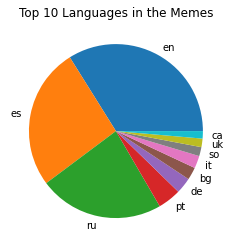

In [18]:
pie_data = meme_data.groupby(["Language"]).count().sort_values(by="Meme ID",ascending=False)[0:10]["Meme ID"]
plt.pie(pie_data, labels = pie_data.keys())
plt.title("Top 10 Languages in the Memes")
plt.show()

Is that how you thought the languages would be distributed?

# Meme Scores!

Memegenerator has voting capability. By clicking the up or down arrow users can increase / descrease this score. Let's see this for our random meme. Run the next cell to generate the preview

In [19]:
preview_url = str(rando['Meme Page URL'].values[0])
preview_url = preview_url.replace("http:","https:")

IFrame(preview_url,width=1000, height=700)

To enrich our dataset even more we found the scores of all of the memes in dataset. We did this by **downloading** all 60000 meme webpages and screen scrapping to find the score that was presented on the page. This took about **4 Hours** so we won't recreate this here. We will however open a CSV file of these scores and add them to our dataset, just like we did with the language information. In this case for memes we could not find the score for (because there were deleted from the site for example) we just use the place holder value `NaN` instead.



Run the next cell to do this and preview a few random scores.

In [20]:
#Lets open the file and have a peak.
meme_scores = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/meme_scores.csv",dtype={'Meme ID': object})
meme_scores["Meme ID"] = meme_scores["Meme ID"].astype(str)
meme_scores.sample(5)

,Meme ID,Score
19927,12995659,0
23548,10589141,51
23571,13925911,0
15883,16760572,0
6146,10677263,51


## Constructing the Final Data Set

Let's add this data to our original dataset by matching on the **Meme ID** column. Then let's look at a couple of random entries of our newly enriched completed dataset. For memes that we couldn't get a score for, we drop from the dataset. (We missed some scores because the memes were deleted from the website) Run the next cell to create our final version of the dataset with all of enriched data and display a few random entries. Notice how we add a column called _Score_.


In [21]:
#Original Dataset
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data["Meme ID"] = meme_data["Meme ID"].astype(str)

#open CSV of language info and create a dataframe
lang_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/language_data.csv")
lang_data["Meme ID"] = lang_data["Meme ID"].astype(str)

#merge language data to meme data frame
meme_data = pd.merge(meme_data,lang_data,on="Meme ID", how = "outer")

#Meme Score Added
meme_scores = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/meme_scores.csv",dtype={'Meme ID': object})
meme_scores["Meme ID"] = meme_scores["Meme ID"].astype(str)
meme_data = pd.merge(meme_data,meme_scores,on="Meme ID", how = "outer")
meme_data.dropna(thresh=8,inplace=True)

#set our random item to be from our new dataframe
rando = meme_data.sample(1)
#meme_data.sample(5)




---


# The Final Analysis: Scores


Let's take a look at some aspects of our data now that we have enriched it with all the extra pieces:

- Language 
- Scores

First our average score...

In [22]:
print("Average score of memes: ",meme_data["Score"].mean())

Average score of memes:  10.576686894303052


## Average Scores by Language

Let's see what our averages scores are for all of the languages in our dataset.

In [23]:
print("Average score by languages, top 10 only: ")
top_by_language = pd.DataFrame(meme_data.groupby("Language").mean()["Score"].sort_values(ascending=False))
top_by_language

Average score by languages, top 10 only: 


,Score
Language,
ar,44.666667
en,30.020067
no,19.957854
af,17.688571
da,14.816667
fi,11.815603
sv,11.495327
nl,7.625000
de,7.418459



## Top Score by Language

Run the cell below and add the two letter code of a _Language_ in the box below to see the highest scoring meme in that category. Click the **Show** button to retrieve the top meme.

In [24]:
def show_top_by_language(language_choice):
  top_lang_score = pd.DataFrame(meme_data[meme_data["Language"] == language_choice])
  top_lang_score = top_lang_score.sort_values(by="Score",ascending=False).head(1)
  display(Image(url=top_lang_score['Archived URL'].values[0], format='jpg'))
  display(top_lang_score)

language_textbox = widgets.Text(
    value = 'de',
    description = 'Language'

)

print("Type in any two letter language code to see the top scoring meme in that language")
show_top_lang_control = interact_manual.options(manual_name="Show")
show_top_lang_control(show_top_by_language,language_choice=language_textbox);




Type in any two letter language code to see the top scoring meme in that language


interactive(children=(Text(value='de', description='Language'), Button(description='Show', style=ButtonStyle()…

Let's see what our averages scores are for the top 25 Base Memes in our dataset.

In [25]:
print("Average score by base memes, top 25 only: ")
top_by_category = pd.DataFrame(meme_data.groupby("Base Meme Name").mean()["Score"].sort_values(ascending=False)[0:25])
top_by_category

Average score by base memes, top 25 only: 


,Score
Base Meme Name,
Scumbag Analytic Philosopher,159.400000
Douchebag Roommate,134.437500
Fallout 3,117.142857
Jonnen Neuvo,111.000000
PTSD Karate Kyle,88.272727
Stereotypical Corps Guy,85.714286
Idiot Nerd Girl,85.066667
Condescending Wonka,84.750000
Privilege Denying Feminist,82.882353


## Highest Scoring Meme by Meme Catgory

Run the cell below and dd the name of a _Base Meme Name_ in the box below to see the highest scoring meme in that category. Click the **Show** button to retrieve the top meme. But first, let's remind ourselves of the top 25 meme categories in the data set.

In [26]:
top_25_cat

,Meme ID
Base Meme Name,
Y U No,766
Futurama Fry,663
Insanity Wolf,612
Philosoraptor,531
The Most Interesting Man In The World,511
Success Kid,510
Foul Bachelor Frog,469
Socially Awkward Penguin,446
Advice Yoda Gives,420


In [27]:
#Run this cell to load the previewer
def show_top_by_category(category_choice):
  top_cat_score = pd.DataFrame(meme_data[meme_data["Base Meme Name"] == category_choice])
  top_cat_score = top_cat_score.sort_values(by="Score",ascending=False).head(1)
  display(Image(url=top_cat_score['Archived URL'].values[0], format='jpg'))
  display(top_cat_score)
 
category_textbox = widgets.Text(
    value = 'Sudden Clarity Clarence',
    description = 'Category'

)
print("Copy/Paste a Meme Category from above to see the top scoring meme in that Category.")
show_top_cat_control = interact_manual.options(manual_name="Show")
show_top_cat_control(show_top_by_category,category_choice=category_textbox);

Copy/Paste a Meme Category from above to see the top scoring meme in that Category.


interactive(children=(Text(value='Sudden Clarity Clarence', description='Category'), Button(description='Show'…

## Highest Scoring Meme in the dataset!


Now that we've explored some different dimensions of the data let's take a look at the hightest scoring meme in the whole data set. Run the final code cell below to find out what it is.

In [28]:
display(Image(url=meme_data[meme_data['Score'] == meme_data['Score'].max()]['Archived URL'].values[0], format='jpg'))
meme_data[meme_data['Score'] == meme_data['Score'].max()]

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text,Language,Score
32193,21335866,http://webarchive.loc.gov/all/0/http://cdn.mem...,Trollface,http://memegenerator.net/instance/21335866,4979f0c5be91788f290afa4a4791be4c,45715.0,guys press ctrl+like and see what happens,Trollface,guys,press ctrl+like and see what happens,en,2970.0
